In [1]:
!pip install -q -U diffusers 

In [2]:
import torch

from diffusers import MotionAdapter, AnimateDiffPipeline, DDIMScheduler
from diffusers.utils import export_to_gif
from IPython.display import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-02-13 11:13:31.735678: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 11:13:31.735819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 11:13:31.889866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
class CFG:
    model1 = "guoyww/animatediff-motion-adapter-v1-5-2"
    model2 = "SG161222/Realistic_Vision_V5.1_noVAE"
    model3 = "guoyww/animatediff-motion-lora-zoom-out"
    seed = 41
    num_inference_steps = 25
    num_frames = 24

In [4]:

# Load the motion adapter
adapter = MotionAdapter.from_pretrained(CFG.model1)

# load SD 1.5 based finetuned model
pipe = AnimateDiffPipeline.from_pretrained(CFG.model2, motion_adapter=adapter)
pipe.load_lora_weights(CFG.model3, adapter_name="zoom-out")

scheduler = DDIMScheduler.from_pretrained(
    CFG.model2, subfolder="scheduler", clip_sample=False, timestep_spacing="linspace", steps_offset=1
)
pipe.scheduler = scheduler

# enable memory savings
pipe.enable_vae_slicing()
pipe.enable_model_cpu_offload()

config.json:   0%|          | 0.00/455 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.82G [00:00<?, ?B/s]

The config attributes {'motion_activation_fn': 'geglu', 'motion_attention_bias': False, 'motion_cross_attention_dim': None} were passed to MotionAdapter, but are not expected and will be ignored. Please verify your config.json configuration file.


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

The config attributes {'center_input_sample': False, 'flip_sin_to_cos': True, 'freq_shift': 0, 'mid_block_type': 'UNetMidBlock2DCrossAttn', 'only_cross_attention': False, 'attention_head_dim': 8, 'dual_cross_attention': False, 'class_embed_type': None, 'addition_embed_type': None, 'num_class_embeds': None, 'upcast_attention': False, 'resnet_time_scale_shift': 'default', 'resnet_skip_time_act': False, 'resnet_out_scale_factor': 1.0, 'time_embedding_type': 'positional', 'time_embedding_dim': None, 'time_embedding_act_fn': None, 'timestep_post_act': None, 'time_cond_proj_dim': None, 'conv_in_kernel': 3, 'conv_out_kernel': 3, 'projection_class_embeddings_input_dim': None, 'class_embeddings_concat': False, 'mid_block_only_cross_attention': None, 'cross_attention_norm': None, 'addition_embed_type_num_heads': 64} were passed to UNetMotionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


diffusion_pytorch_model.safetensors:   0%|          | 0.00/77.4M [00:00<?, ?B/s]

In [5]:
output=pipe(
    prompt=("spectacular start of a space shuttle, realistic photograph,\
            perfect blue sky, coastal landscape"
    ),
    negative_prompt="bad quality",
    num_frames=16,
    guidance_scale=7.5,
    num_inference_steps=25,
    generator=torch.Generator("cpu").manual_seed(42),
)


  0%|          | 0/25 [00:00<?, ?it/s]

In [6]:
frames=output.frames[0]
export_to_gif(frames, "animation.gif")

'animation.gif'

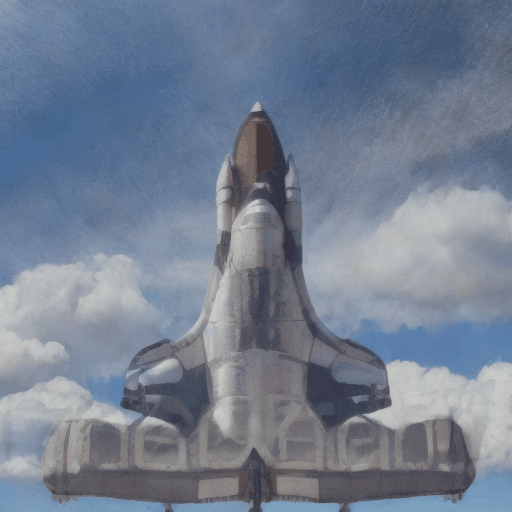

In [7]:

Image(open('animation.gif','rb').read())
